# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Imports

import numpy as np
import scipy
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

In [10]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [21]:
# 1. Normality Tests on Body Temperature

# Shapiro-Wilk Test - suitable for smaller samples of data

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = df['temperature']
# normality test
stat, p = shapiro(data)
print('t=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Temperature data looks Gaussian (fail to reject H0)')
else:
    print('Temperature data does not look Gaussian (reject H0)')

t=0.987, p=0.233
Temperature data looks Gaussian (fail to reject H0)


In [35]:
# 1. Normality Test(2)

# D'Agostino and Pearson's Test

from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['temperature']
# normality test
stat, p = normaltest(data)
print('t=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Temperature data looks Gaussian (fail to reject H0)')
else:
    print('Temperature data does not look Gaussian (reject H0)')

t=2.704, p=0.259
Temperature data looks Gaussian (fail to reject H0)


In [5]:
# 1. Graphical Normality Test

values = df['temperature'].values
# Compute mean and standard deviation: mu, sigma
mu = np.mean(values)
sigma = np.std(values)

In [51]:
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 130)

C:\Users\arpan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.0516956 , 0.08615933, 0.25847799, 0.41356478, 0.58588344,
        0.43079664, 0.27570985, 0.10339119, 0.01723187, 0.01723187]),
 array([ 96.21080483,  96.657205  ,  97.10360516,  97.55000532,
         97.99640549,  98.44280565,  98.88920582,  99.33560598,
         99.78200615, 100.22840631, 100.67480647]),
 <a list of 10 Patch objects>)

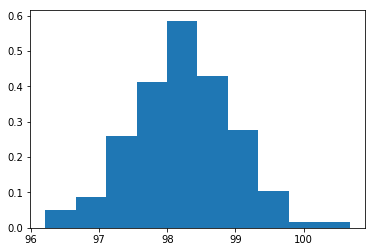

In [52]:
plt.hist(samples, normed=True)

# # Get the CDF of the samples and of the data
# x_theor, y_theor = ECDF(samples)
# x, y = ECDF(values)



# Yes, the distribution of body temperatures is normal

In [36]:
# 2. Sample Size

# The sample size is 130 (i.e., the number of observations). 

# 2. Independence of observations ????

In [58]:
# 3.

# Bootstrap Hypothesis Test - Resampling the observed data and re-computing the test statistic(mean)

def bootstrap_replicate(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
    
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate(values, np.mean)

np.mean(bs_replicates)

# The mean is not 98.6 degrees F.

98.247909

In [59]:
# 3. Frequentist Test

# A one-sample test should be used because there is just one group (set of observations)
# and the test statistic value is compared to the null hypothesis.

# A two-sample test requires two independent set of observations, 
# the means of which can b compared. Hence, this cannot be used hre.

In [60]:
# 3.

# In this situation, it is more apropriate to use z-statistic
# because the sample size > 30 and the standard deviation of the population is known.

In [ ]:
# 3. How can the other test(two-sample test) be usd here?